In [1]:
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
import numpy as np
import cv2

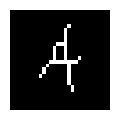

In [3]:
image_path = 'A-0.png'
image = io.imread(image_path)

if image.ndim == 3:
    image = color.rgb2gray(image)

threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

skeleton = skeletonize(binary_image)

image = transform.resize(image, (28, 28))
skeleton = transform.resize(skeleton, (28, 28))

plt.figure(figsize=(1, 1))

plt.imshow(skeleton, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('skeleton_image.png', format='png', dpi=28)

In [15]:
import cv2
import numpy as np

path = 'skeleton_image.png'
img = cv2.imread(path, 0)

(rows, cols) = np.nonzero(img)

endpoint_coords = []

for (r, c) in zip(rows, cols):
    top = max(0, r - 1)
    right = min(img.shape[1] - 1, c + 1)
    bottom = min(img.shape[0] - 1, r + 1)
    left = max(0, c - 1)

    sub_img = img[top: bottom + 1, left: right + 1]
    if np.sum(sub_img) == 255*2:
        endpoint_coords.append((r,c))

print(endpoint_coords)

[(4, 16), (13, 19), (18, 8), (22, 17)]


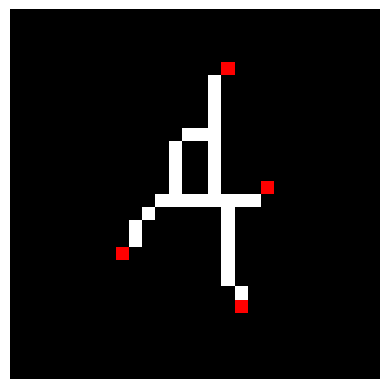

In [16]:
skeleton_image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)
output_image = cv2.cvtColor(skeleton_image, cv2.COLOR_GRAY2BGR)
for point in endpoint_coords:
    y, x = point
    output_image[y, x] = (0, 0, 255)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [21]:
import cv2
import numpy as np
import itertools

path = 'skeleton_image.png'
img = cv2.imread(path, 0)

(rows, cols) = np.nonzero(img)

endpoint_coords = []

for (r, c) in zip(rows, cols):
    top = max(0, r - 1)
    right = min(img.shape[1] - 1, c + 1)
    bottom = min(img.shape[0] - 1, r + 1)
    left = max(0, c - 1)

    sub_img = img[top: bottom + 1, left: right + 1]
    if np.sum(sub_img) >= 255*2 and np.sum(sub_img) <= 255*4:
        endpoint_coords.append((r, c))

print(endpoint_coords)

[(4, 16), (5, 15), (6, 15), (7, 15), (8, 15), (9, 13), (9, 15), (10, 12), (10, 15), (11, 12), (11, 15), (12, 12), (12, 15), (13, 19), (14, 11), (14, 12), (14, 13), (14, 14), (14, 17), (14, 18), (15, 10), (16, 9), (16, 16), (17, 9), (17, 16), (18, 8), (18, 16), (19, 16), (20, 16), (21, 17), (22, 17)]


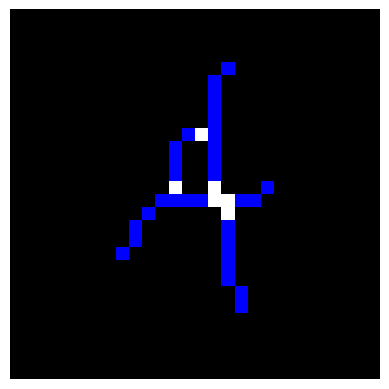

In [22]:
skeleton_image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)
output_image = cv2.cvtColor(skeleton_image, cv2.COLOR_GRAY2BGR)
for point in endpoint_coords:
    y, x = point
    output_image[y, x] = (255, 0, 0)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [25]:
min_distance = 0

# Create a list to store the final selected points
final_coords = []

# Check if points are neighbors and remove some to ensure they are not neighbors
for coord1, coord2 in itertools.combinations(endpoint_coords, 2):
    dist = np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)
    if dist >= min_distance:
        final_coords.extend([coord1, coord2])

print(final_coords)

[(4, 16), (5, 15), (4, 16), (6, 15), (4, 16), (7, 15), (4, 16), (8, 15), (4, 16), (9, 13), (4, 16), (9, 15), (4, 16), (10, 12), (4, 16), (10, 15), (4, 16), (11, 12), (4, 16), (11, 15), (4, 16), (12, 12), (4, 16), (12, 15), (4, 16), (13, 19), (4, 16), (14, 11), (4, 16), (14, 12), (4, 16), (14, 13), (4, 16), (14, 14), (4, 16), (14, 17), (4, 16), (14, 18), (4, 16), (15, 10), (4, 16), (16, 9), (4, 16), (16, 16), (4, 16), (17, 9), (4, 16), (17, 16), (4, 16), (18, 8), (4, 16), (18, 16), (4, 16), (19, 16), (4, 16), (20, 16), (4, 16), (21, 17), (4, 16), (22, 17), (5, 15), (6, 15), (5, 15), (7, 15), (5, 15), (8, 15), (5, 15), (9, 13), (5, 15), (9, 15), (5, 15), (10, 12), (5, 15), (10, 15), (5, 15), (11, 12), (5, 15), (11, 15), (5, 15), (12, 12), (5, 15), (12, 15), (5, 15), (13, 19), (5, 15), (14, 11), (5, 15), (14, 12), (5, 15), (14, 13), (5, 15), (14, 14), (5, 15), (14, 17), (5, 15), (14, 18), (5, 15), (15, 10), (5, 15), (16, 9), (5, 15), (16, 16), (5, 15), (17, 9), (5, 15), (17, 16), (5, 15),

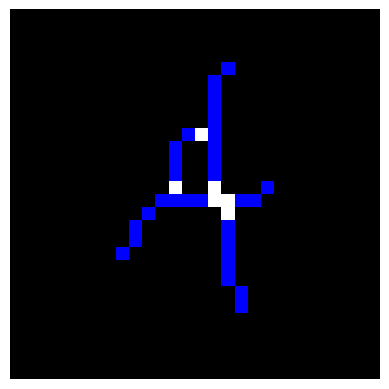

In [26]:
skeleton_image = cv2.imread('skeleton_image.png', cv2.IMREAD_GRAYSCALE)
output_image = cv2.cvtColor(skeleton_image, cv2.COLOR_GRAY2BGR)
for point in final_coords:
    y, x = point
    output_image[y, x] = (255, 0, 0)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()